In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pathlib
import cv2
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
df_url = "C:\\Users\\josek\\Documents\\gitMCC\\MCC-2023-1AD\\AffectiveComputingAI\\training"
data_dir = pathlib.Path(df_url)

In [9]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)
print(list(data_dir.glob('*/*.jpeg')))

5056
[WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/100.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/101.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/102.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/103.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/104.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/105.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/106.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/107.jpeg'), WindowsPath('C:/Users/josek/Documents/gitMCC/MCC-2023-1AD/AffectiveComputingAI/training/bored/108.jpeg'), WindowsPath('C:/Users/josek/Documents/gi

In [10]:
bored_list = list(data_dir.glob('bored/*'))
engaged_list = list(data_dir.glob('engaged/*'))
excited_list = list(data_dir.glob('excited/*'))
focused_list = list(data_dir.glob('focused/*'))
interested_list = list(data_dir.glob('interested/*'))
relaxed_list = list(data_dir.glob('relaxed/*'))

In [13]:
import face_recognition

def process_image(image_path, label, directory):
    try:
        # Leer la imagen utilizando OpenCV
        image = cv2.imread(str(image_path))
        
        # Convertir la imagen a escala de grises
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Redimensionar la imagen a 150x150
        resized_image = cv2.resize(gray_image, (150, 150))
        
        # Detectar puntos de referencia faciales y ubicaciones
        face_landmarks_list = face_recognition.face_landmarks(resized_image)
        face_locations = face_recognition.face_locations(resized_image)

        # Verificar si se detectaron caras
        if face_locations:
            # Recortar la imagen según las ubicaciones de las caras
            for location in face_locations:
                top, right, bottom, left = location
                cropped_image = resized_image[top:bottom, left:right]
                directory['face_closeup'].append(cropped_image)

            # Añadir información al directorio
            directory['face_landmarks'].append(face_landmarks_list)
            directory['label'].append(label)
            directory['image'].append(resized_image)
        else:
            print(f"No se detectaron caras en la imagen: {image_path}")

    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")

# Directorio para almacenar la información procesada
directorio = {'image': [], 'face_closeup': [], 'face_landmarks': [], 'label': []}

# Listas de imágenes y sus respectivas etiquetas
image_lists = [bored_list, engaged_list, excited_list, focused_list, interested_list, relaxed_list]
labels = ['bored', 'engaged', 'excited', 'focused', 'interested', 'relaxed']

# Procesamiento de imágenes
for image_list, label in zip(image_lists, labels):
    for image_path in image_list:
        process_image(image_path, label, directorio)

# Obtener la longitud máxima entre las listas en directorio
max_length = max(len(v) for v in directorio.values())

# Rellenar las listas más cortas con None para que tengan la misma longitud que la lista más larga
for k, v in directorio.items():
    if len(v) < max_length:
        directorio[k] += [None] * (max_length - len(v))

# Verificar que todas las listas tengan la misma longitud
assert all(len(v) == max_length for v in directorio.values())

# Crear DataFrame con la información procesada
df = pd.DataFrame(directorio)


No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training\bored\215.jpeg
No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training\bored\221.jpeg
No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training\bored\223.jpeg
No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training\bored\225.jpeg
No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training\bored\226.jpeg
No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training\bored\227.jpeg
No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training\bored\228.jpeg
No se detectaron caras en la imagen: C:\Users\josek\Documents\gitMCC\MCC-2023-1AD\AffectiveComputingAI\training

In [14]:
df.head()    

,image,face_closeup,face_landmarks,label
0,"[[165, 166, 164, 167, 167, 166, 167, 167, 167,...","[[161, 160, 161, 161, 161, 161, 161, 160, 99, ...","[{'chin': [(62, 83), (62, 88), (63, 93), (63, ...",bored
1,"[[165, 166, 165, 166, 167, 167, 167, 167, 167,...","[[160, 161, 160, 161, 161, 162, 161, 162, 132,...","[{'chin': [(62, 83), (62, 88), (63, 93), (63, ...",bored
2,"[[165, 165, 165, 166, 167, 166, 166, 167, 167,...","[[160, 161, 161, 60, 36, 76, 88, 88, 92, 102, ...","[{'chin': [(63, 82), (63, 87), (63, 91), (63, ...",bored
3,"[[165, 166, 165, 165, 166, 167, 167, 167, 167,...","[[160, 161, 160, 45, 42, 81, 88, 88, 92, 101, ...","[{'chin': [(63, 83), (63, 87), (63, 92), (64, ...",bored
4,"[[165, 166, 166, 166, 166, 167, 166, 166, 167,...","[[160, 160, 160, 41, 43, 81, 88, 88, 92, 102, ...","[{'chin': [(63, 83), (63, 88), (63, 92), (64, ...",bored


In [15]:
df.dropna(inplace=True)

In [16]:
def extract_facial_landmarks(face_landmarks_list):
    """
    Toma los diccionarios almacenados en la columna Hitos faciales y elimina las keys,
    dejando solo las coordenadas de donde se encuentran los puntos faciales.
    """
    landmarks_array = []
    for face_landmarks in face_landmarks_list:
        landmarks = []
        for facial_feature in face_landmarks.keys():
            landmarks.extend(face_landmarks[facial_feature])
        landmarks_array.append(landmarks)
    return np.array(landmarks_array)

# Sobrescribir la columna 'Hitos faciales' con las coordenadas de hitos faciales
df['face_landmarks'] = df['face_landmarks'].apply(extract_facial_landmarks)

In [17]:
df.head()

,image,face_closeup,face_landmarks,label
0,"[[165, 166, 164, 167, 167, 166, 167, 167, 167,...","[[161, 160, 161, 161, 161, 161, 161, 160, 99, ...","[[[62, 83], [62, 88], [63, 93], [63, 97], [64,...",bored
1,"[[165, 166, 165, 166, 167, 167, 167, 167, 167,...","[[160, 161, 160, 161, 161, 162, 161, 162, 132,...","[[[62, 83], [62, 88], [63, 93], [63, 97], [64,...",bored
2,"[[165, 165, 165, 166, 167, 166, 166, 167, 167,...","[[160, 161, 161, 60, 36, 76, 88, 88, 92, 102, ...","[[[63, 82], [63, 87], [63, 91], [63, 96], [65,...",bored
3,"[[165, 166, 165, 165, 166, 167, 167, 167, 167,...","[[160, 161, 160, 45, 42, 81, 88, 88, 92, 101, ...","[[[63, 83], [63, 87], [63, 92], [64, 97], [65,...",bored
4,"[[165, 166, 166, 166, 166, 167, 166, 166, 167,...","[[160, 160, 160, 41, 43, 81, 88, 88, 92, 102, ...","[[[63, 83], [63, 88], [63, 92], [64, 97], [65,...",bored


In [18]:
df_copy = df

In [19]:
df_copy.head()

,image,face_closeup,face_landmarks,label
0,"[[165, 166, 164, 167, 167, 166, 167, 167, 167,...","[[161, 160, 161, 161, 161, 161, 161, 160, 99, ...","[[[62, 83], [62, 88], [63, 93], [63, 97], [64,...",bored
1,"[[165, 166, 165, 166, 167, 167, 167, 167, 167,...","[[160, 161, 160, 161, 161, 162, 161, 162, 132,...","[[[62, 83], [62, 88], [63, 93], [63, 97], [64,...",bored
2,"[[165, 165, 165, 166, 167, 166, 166, 167, 167,...","[[160, 161, 161, 60, 36, 76, 88, 88, 92, 102, ...","[[[63, 82], [63, 87], [63, 91], [63, 96], [65,...",bored
3,"[[165, 166, 165, 165, 166, 167, 167, 167, 167,...","[[160, 161, 160, 45, 42, 81, 88, 88, 92, 101, ...","[[[63, 83], [63, 87], [63, 92], [64, 97], [65,...",bored
4,"[[165, 166, 166, 166, 166, 167, 166, 166, 167,...","[[160, 160, 160, 41, 43, 81, 88, 88, 92, 102, ...","[[[63, 83], [63, 88], [63, 92], [64, 97], [65,...",bored


In [20]:
# Eliminar la capa adicional de anidación en la columna "Hitos faciales"
df_copy['face_landmarks'] = df_copy['face_landmarks'].apply(lambda x: [item for sublist in x for item in sublist])

# Verificar el resultado
df_copy.head()

,image,face_closeup,face_landmarks,label
0,"[[165, 166, 164, 167, 167, 166, 167, 167, 167,...","[[161, 160, 161, 161, 161, 161, 161, 160, 99, ...","[[62, 83], [62, 88], [63, 93], [63, 97], [64, ...",bored
1,"[[165, 166, 165, 166, 167, 167, 167, 167, 167,...","[[160, 161, 160, 161, 161, 162, 161, 162, 132,...","[[62, 83], [62, 88], [63, 93], [63, 97], [64, ...",bored
2,"[[165, 165, 165, 166, 167, 166, 166, 167, 167,...","[[160, 161, 161, 60, 36, 76, 88, 88, 92, 102, ...","[[63, 82], [63, 87], [63, 91], [63, 96], [65, ...",bored
3,"[[165, 166, 165, 165, 166, 167, 167, 167, 167,...","[[160, 161, 160, 45, 42, 81, 88, 88, 92, 101, ...","[[63, 83], [63, 87], [63, 92], [64, 97], [65, ...",bored
4,"[[165, 166, 166, 166, 166, 167, 166, 166, 167,...","[[160, 160, 160, 41, 43, 81, 88, 88, 92, 102, ...","[[63, 83], [63, 88], [63, 92], [64, 97], [65, ...",bored


In [21]:
# Encontrar la longitud máxima de puntos faciales
max_len = df['face_landmarks'].apply(len).max()
print(f"Longitud máxima de face landmarks: {max_len}")

Longitud máxima de face landmarks: 144


In [22]:
# Definir la función para rellenar con ceros hasta una longitud específica
def fill_with_zeros(lst, length):
    return lst + [[0, 0]] * (length - len(lst))

# Obtener la longitud máxima de puntos faciales
max_len = df_copy['face_landmarks'].apply(len).max()

# Rellenar todas las listas de puntos faciales con ceros hasta la longitud máxima
df_copy['face_landmarks'] = df_copy['face_landmarks'].apply(lambda x: fill_with_zeros(x, max_len))

# Verificar el resultado
df_copy.head()


,image,face_closeup,face_landmarks,label
0,"[[165, 166, 164, 167, 167, 166, 167, 167, 167,...","[[161, 160, 161, 161, 161, 161, 161, 160, 99, ...","[[62, 83], [62, 88], [63, 93], [63, 97], [64, ...",bored
1,"[[165, 166, 165, 166, 167, 167, 167, 167, 167,...","[[160, 161, 160, 161, 161, 162, 161, 162, 132,...","[[62, 83], [62, 88], [63, 93], [63, 97], [64, ...",bored
2,"[[165, 165, 165, 166, 167, 166, 166, 167, 167,...","[[160, 161, 161, 60, 36, 76, 88, 88, 92, 102, ...","[[63, 82], [63, 87], [63, 91], [63, 96], [65, ...",bored
3,"[[165, 166, 165, 165, 166, 167, 167, 167, 167,...","[[160, 161, 160, 45, 42, 81, 88, 88, 92, 101, ...","[[63, 83], [63, 87], [63, 92], [64, 97], [65, ...",bored
4,"[[165, 166, 166, 166, 166, 167, 166, 166, 167,...","[[160, 160, 160, 41, 43, 81, 88, 88, 92, 102, ...","[[63, 83], [63, 88], [63, 92], [64, 97], [65, ...",bored


In [23]:
# Encontrar la longitud máxima de puntos faciales
max_len = df_copy['face_landmarks'].apply(len).max()
print(f"Longitud máxima de face_landmarks: {max_len}")

# Encontrar la longitud máxima de puntos faciales
min_len = df_copy['face_landmarks'].apply(len).min()
print(f"Longitud minima de face_landmarks: {min_len}")

Longitud máxima de face_landmarks: 144
Longitud minima de face_landmarks: 144


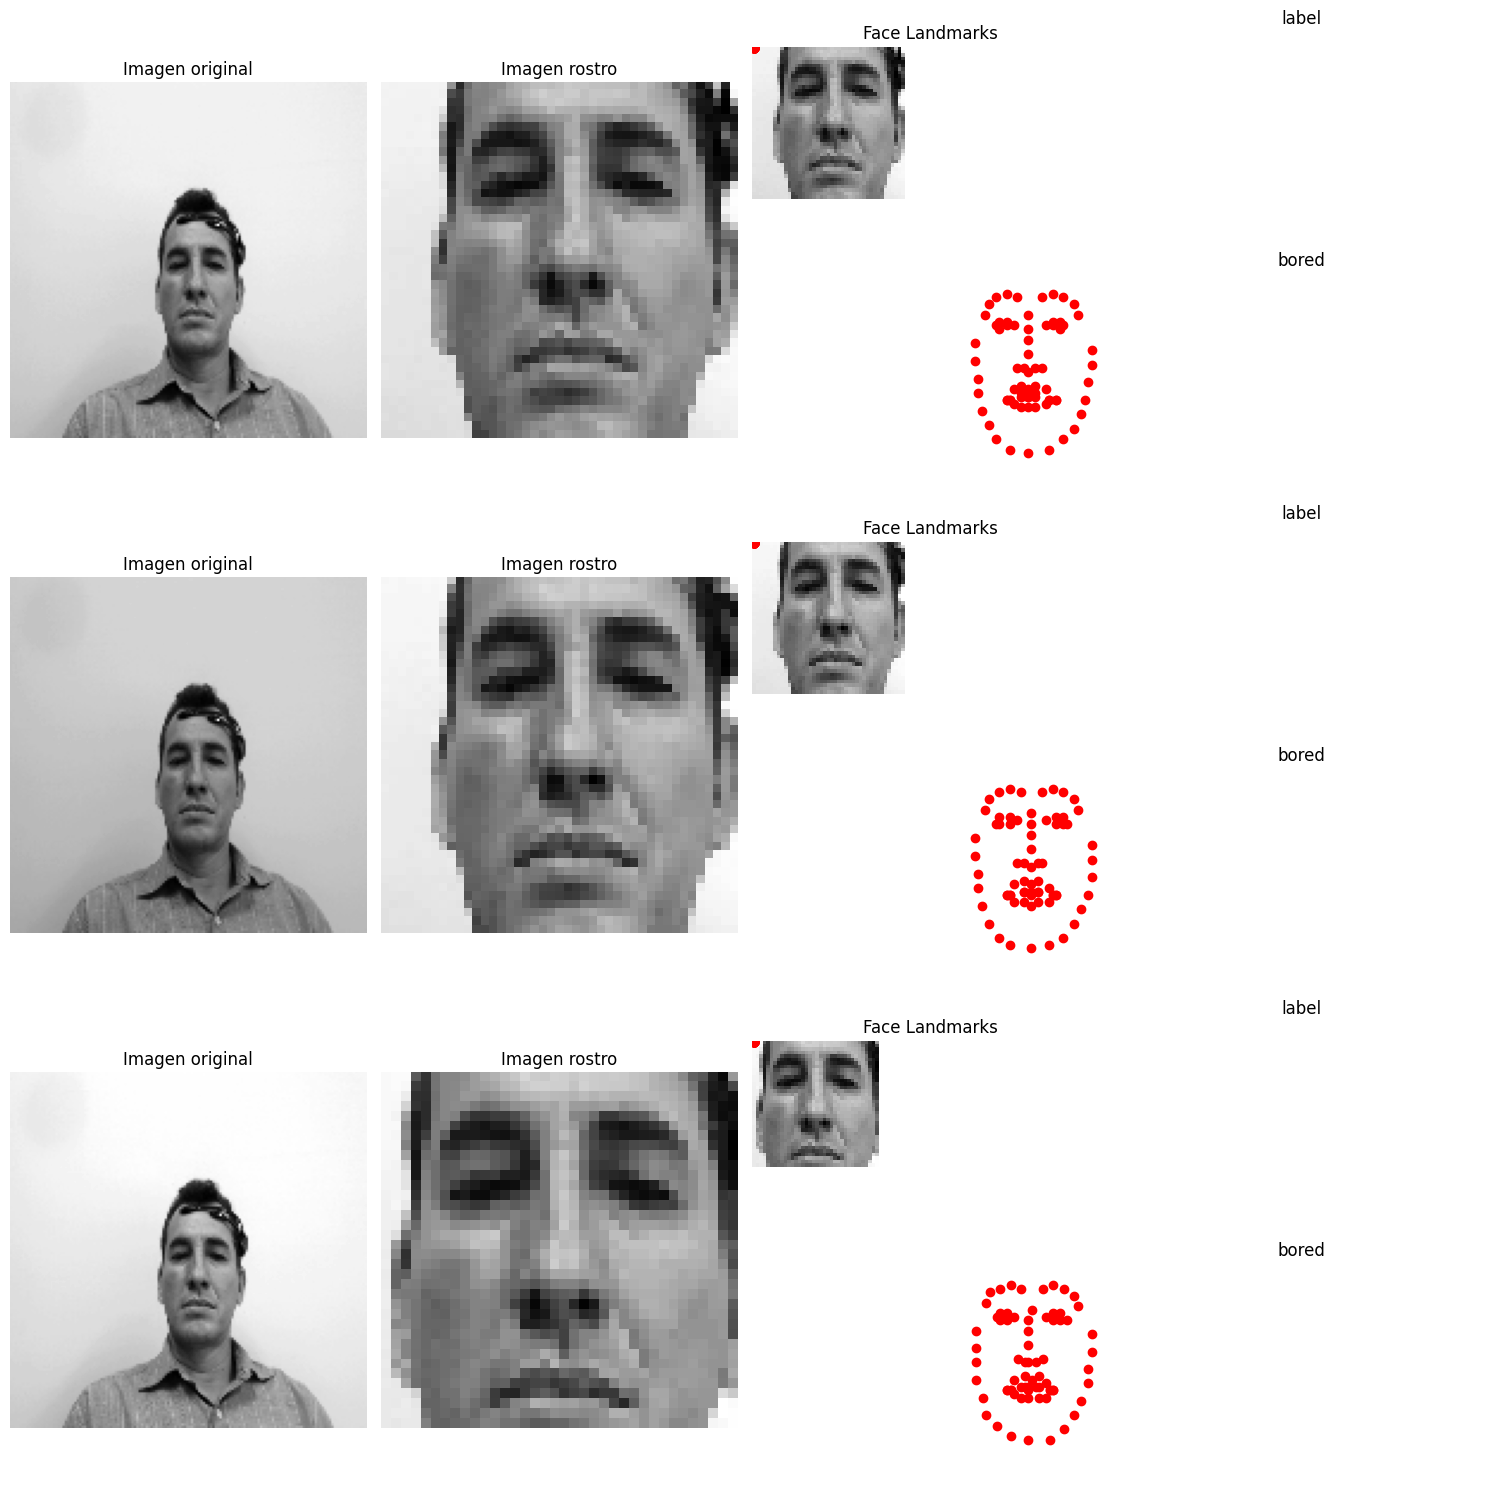

In [24]:
# Función para plotear las imágenes con hitos faciales y etiquetas
def plot_images(df, num_images=3):
    fig, axs = plt.subplots(num_images, 4, figsize=(15, 15))

    for i in range(num_images):
        # Obtener los datos de la fila i
        imagen = np.array(df.iloc[i]['image'])
        imagen_zoom = np.array(df.iloc[i]['face_closeup'])
        hitos_faciales = np.array(df.iloc[i]['face_landmarks'])
        labels = df.iloc[i]['label']

        # Plotear la imagen normal
        axs[i, 0].imshow(imagen, cmap='gray')
        axs[i, 0].axis('off')
        #axs[i, 0].set_title('Imagen normal')
        axs[i, 0].set_title('Imagen original')

        # Plotear la imagen con zoom
        axs[i, 1].imshow(imagen_zoom, cmap='gray')
        axs[i, 1].axis('off')
        axs[i, 1].set_title('Imagen rostro')

        # Plotear los hitos faciales sobre la imagen con zoom
        axs[i, 2].imshow(imagen_zoom, cmap='gray')
        axs[i, 2].plot(hitos_faciales[:, 0], hitos_faciales[:, 1], 'ro')
        axs[i, 2].axis('off')
        axs[i, 2].set_title('Face Landmarks')

        # Mostrar las etiquetas
        axs[i, 3].text(0.5, 0.5, labels, horizontalalignment='center', verticalalignment='center', fontsize=12)
        axs[i, 3].axis('off')
        axs[i, 3].set_title('label')

    plt.tight_layout()
    plt.show()

# Plotear las primeras tres imágenes
plot_images(df_copy, num_images=3)

In [25]:
df_copy.to_pickle('affective_dataset_v2.pkl')